# **Projet pluridisciplinaire**

## **Sujet**  
---

Dans le cadre d’un cours appelé « **Projet pluridisciplinaire** », pour clôturer notre premier semestre de Master 1 Sciences cognitives, nous avons un projet à effectué **sous 5 jours**, à rendre sous 2 formats.
* **Un fichier notebook** : Constitué de nos recherches, hypothèse, analyses et conclusion sur le sujet.
* **Une vidéo** : vidéo de vulgarisation de maximum 4 minutes qui explique une partie de nos résultats. Celle ci doit être adaptée au public et représentée, de manière accessible, fluide et intéressante, nos résultats.

Notre analyse se fait sur des données d’études faites sur des groupes de souris. Le but de cette étude est d’explorer les impacts de différents régimes sur la vieillesse. 

Nous avons **4 groupes** differents : 
* **Jeunes** : 1 groupe de personnes jeunes (3 mois) avec un régime **standard** (10% de gras, 20% de proteines et 70% de carbohydrates)
* **Agés** : 3 groupes de personnes âgées (12 mois) avec différent régime
    - **Ages (Standard)** : personnes agée avec un régime **standard**
    - **Ages (Restrictive diet)** : personnes agéee en sous régime (-20% en quantités que le régime standard, sans dénutriment)
    - **Ages (High fat diet)** : personnes agéee en régime gras (60% de gras, 12% de proteines et 28% de carbohydrates)

Tous les groupes sont étudiés pendant 3 mois avec huit tests qui évaluent chacun : les fonctions motrices, l’anxiété, la mémoire, et l'olfaction ainsi que la taille de l’hippocampe.

## **Table des matières**
---
* [Documentation](#0)
* [1) Exploration des données](#1)
    * [1.1) Lisibilité des données](#1_1)
    * [1.2) Existence de duplicatat](#1_2)
    * [1.3) Recherche des outliers](#1_3)

* [2) Nettoyage des données](#2)
    * [2.1) Gestion des outliers](#2_1)

* [3) Matrice de corrélation](#3)
* [4) Anova : X et Y](#4)
    * [4.1) Shapiro-Wilk : vérification de la condition de normalité ](#4_1)
    * [4.2) Levene : vérification de la condition sur l'homogénéité des variances](#4_2)
    * [4.3) ANOVA](#4_3)
    * [4.3) Kurask-Wallis](#4_3)
    * [4.3) Test Post-hoc : Dunn](#4_3)
    * [4.3) Test Post-hoc : Tukey's](#4_4)





* [3) Fonction motrice : Rotarod et Test d'aggripement](#3)
    * [3.1) Rotarod](#3_1)
    * [3.2) Test d'aggripement](#3_2)

* [4) Fonction anxiété : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [5) Fonction mémoire : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [6) Fonction olfactive : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [7) Fonction olfactive](#7)

* [5 ) Conclusion aux 3 questions](#5)


## Documentation <a class="anchor" id="1"></a>
---
**Variables :**

* **id** : (ID) Numéro d'identification des souris
* **group**	: (Traitement) Type de régime alimentaire donné aux souris
* **age_bf** : (age avant le traitement) j
* **age_af** : (age a la fin du traitement) j+3 mois
* **weight_bf**	: (poids avant le traitement)
* **weight_af**	: (poids a la fin du traitement)
* **rotarod_time_tot** : (temps total du test en sec) Temps maximal du test 'rotarod'
* **rotarod_time_rec** : (temps sur le rotarod en sec) Temps pour un sujet au test 'rotarod'
* **gripTest_strenght**	: (Force motrice en newton) 
* **openField_distance** : (distance parcourue en cm) Distance que la souris a parcouru en totalité (centre et périphérie)
* **openField_time_tot** : (temps passé au centre en sec) 
* **openField_middle_time** : (temps passé en périphérie en sec)
* **openField_periphery_time** : (temps total du test en sec.1)
* **maze_time_tot**	: (Temps total du test en sec) Temps maximal du test 'maze'
* **mazeTest_time_open** : (temps bras ouvert) Temps passé dans la partie ouverte de la structure
* **mazeTest_time_close** : (temps bras fermé) Temps passé dans la partie fermée de la structure
* **barnes_nb_error** : (Nombre d'erreur pour le test mémoire) 
* **yMaze_pct_alternance** : (% d'alternance) Pourcentage d'alternance entre les différentes parties de la structure du test 'ymaze'
* **olfaction_habituation_time** : (Phase Habituation: temps pour trouver le cookie non caché (sec)) 
* **olfaction_test_time** : (Phase test: temps pour trouver le cookie caché dans la cage (sec))
* **hippocampus_size** : (hippocampal volume (mm3)) Taille de l'hippocampe des souris

**Type de test :**
* **Fonctions motrices** : 
    * Rotarod 
    * Test d'aggripement 
* **Fonctions anxiété** :
    * Openfield 
    * Labyrinthe en croix surélevé

* **Fonction mémoire** : Les tests de la mémoire on pour but de comprendre l’impact qu’à le régime alimentaire sur la vieillesse sur cette fonction cognitive. 2 test ont été effectuées pour tester la mémoire : le test de Barnes et le labyrinthe en Y.
    * **Labyrinthe de Barnes** : Le test de barnes permet de mesurer la mémoire spatiale et la mémoire 1; Il consiste en un cercle fermé contenant 12 passage dont une seul à une sortie. Des repères visuels sont présent tout autour du cercle pour que les souris puissent apprendre ou et la sortie : le protocole dure entre 1 et 5 jours. Dans le test le nombre d’erreur avant d’atteindre la sortie est mesurée (lors du dernier essai) , c’est notre variable dépendante. Nos variable indépendantes sont les différents groupes (jeunes, agées, âgées avec régime restrictif; vieux avec régime gras) 

    Nos hypothese pour ce test sont: 

        * **H0** : Il n'y a pas de différence des performances de mémoire au test de Barnes entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).

        * **H1** : Il existe une différence significative des performances de mémoire au test de Barnes entre les groupes soumis à différents régimes alimentaires.
    
    * **Le Labyrinthe en Y** : Le labyrinthe en Y évalue la aussi la mémoire de la souris. C’est un labyrinthe en forme de Y ou sur chaques branche les pattern sur le sol sont différents. Il est basée sur le fait que les rongeurs aiment à explorer un nouvel environnement  et mesure les séquence de mouvement de l’animal.Il est considéré qu’un rongeur à une meilleur mémoire si il alterne entres des branches différentes. La mesure d’alternance est notre variable dépendante de ce test . Plus il est élevée, mieux la souris à de la mémoire. Nos variable indépendantes sont les différents groupes (jeunes, agées, âgées avec régime restrictif; vieux avec régime gras) 

    Nos hypothese pour ce test sont: 
    
        * **H0** : Il n'y a pas de différence des performances de mémoire au test de Labyrinthe en Y entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).

        * **H1** : Il existe une différence significative des performances de mémoire au  test de Labyrinthe en Y  entre les groupes soumis à différents régimes alimentaires.



* **Olfaction** :
    * Food buried test
* **Volume de l'hippocampe**
    * IRM
---

Fait sur Python 3.12.2.


## 1) Exploration des données <a class="anchor" id="1"></a>
---

In [5]:
# !python3.12 -m pip install pandas matplotlib numpy ipywidgets jupyter xlrd

In [6]:
# Importation 
import pandas as pd # Mise en forme des données
import matplotlib.pyplot as plt # Affichages
import numpy as np # Type et matrices
import seaborn as sns # Affichage graphique
import ipywidgets as widgets
import statsmodels.api as sm


from collections import Counter
from IPython.display import display
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler

In [7]:
df_total = pd.read_excel('ProjetInterdisciplinaire_datas_2024 (1).xls', skiprows=1)
df_total.head(30)

,ID,Traitement,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,...,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
0,1,jeune,3,6,25,25,300,192.0,150,4500.000000,...,80.00,520.00,400,150.0,250.0,3.00,85.0,10.0,90,20.0
1,2,jeune,3,6,26,27,300,177.0,160,4500.000000,...,100.00,500.00,400,160.0,240.0,2.50,80.0,12.0,85,22.0
2,3,jeune,3,6,24,25,300,210.0,140,4800.000000,...,120.00,480.00,400,130.0,270.0,2.75,79.0,8.0,95,19.7
3,4,jeune,3,6,25,26,300,155.0,90,4000.000000,...,110.00,490.00,400,110.0,290.0,2.00,75.0,9.0,90,19.0
4,5,jeune,3,6,28,27,300,160.0,170,4235.000000,...,130.00,470.00,400,145.0,255.0,1.80,88.0,10.0,98,21.0
5,6,jeune,3,6,29,30,300,150.0,125,4100.000000,...,200.00,400.00,400,135.0,265.0,2.00,85.0,11.0,80,20.0
6,7,Ages,12,15,33,35,300,92.0,85,4500.000000,...,48.48,551.60,400,90.0,310.0,7.25,50.0,15.0,150,17.0
7,8,Ages,12,15,32,32,300,NaN,80,4600.000000,...,86.72,513.36,400,75.0,325.0,9.00,65.0,10.0,143,18.0
8,9,Ages,12,15,28,31,300,120.0,75,4445.000000,...,48.56,551.52,400,65.0,335.0,8.00,55.6,7.0,132,17.0
9,10,Ages,12,15,32,34,300,100.0,60,4700.000000,...,35.44,564.64,400,70.0,330.0,7.00,58.3,13.0,127,16.0


In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ID                                                                 42 non-null     int64  
 1   Traitement                                                         42 non-null     object 
 2   age avant le traitement                                            42 non-null     int64  
 3   age a la fin du traitement                                         42 non-null     int64  
 4   poids avant le traitement                                          42 non-null     int64  
 5   poids a la fin du traitement                                       42 non-null     int64  
 6   temps total du test en sec                                         42 non-null     int64  
 7   temps sur le rotarod en sec 

In [9]:
df_total.describe()

,ID,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,temps total du test en sec.1,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,41.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,10.714286,13.714286,31.809524,35.119048,300.0,117.024390,90.285714,4332.283759,600.0,59.857143,540.177143,400.0,71.178571,328.821429,8.103571,61.028571,11.416667,142.333333,16.833333
std,12.267844,3.187519,3.187519,2.948651,11.947451,0.0,74.043395,33.947798,1477.566259,0.0,38.615467,38.615661,0.0,43.060624,43.060624,5.820207,14.843645,2.488796,55.251384,3.712843
min,1.000000,3.000000,6.000000,24.000000,20.000000,300.0,2.000000,40.000000,2300.000000,600.0,9.000000,400.000000,400.0,2.000000,240.000000,0.000000,30.000000,7.000000,80.000000,7.000000
25%,11.250000,12.000000,15.000000,31.000000,25.250000,300.0,51.000000,60.000000,2825.000000,600.0,30.520000,517.480000,400.0,28.500000,308.000000,4.312500,50.725000,10.000000,94.250000,14.900000
50%,21.500000,12.000000,15.000000,33.000000,33.500000,300.0,112.000000,82.500000,4175.156496,600.0,57.000000,543.000000,400.0,78.000000,322.000000,6.900000,61.250000,11.000000,128.500000,18.000000
75%,31.750000,12.000000,15.000000,34.000000,40.750000,300.0,175.000000,113.750000,5386.706395,600.0,82.580000,569.500000,400.0,92.000000,371.500000,9.750000,70.375000,13.750000,196.000000,19.425000
max,42.000000,12.000000,15.000000,35.000000,60.000000,300.0,300.000000,170.000000,7000.000000,600.0,200.000000,591.000000,400.0,160.000000,398.000000,25.000000,88.000000,16.000000,250.000000,22.000000


**1.1 Lisibilité des données**

1. Importation du dataframe sans la première ligne
2. Renommer la deuxième ligne pour avoir le nom du test dans le nom de la variable ainsi qu'un nom plus court
3. Renommer le nom des groupes en un format standard
4. Mettre l'id en tant qu'index du df

In [10]:
rename_dict = {
    'ID': 'id',
    'Traitement': 'group',
    'age avant le traitement': 'age_bf',
    'age a la fin du traitement': 'age_af',
    'poids avant le traitement': 'weight_bf',
    'poids a la fin du traitement': 'weight_af',
    'temps total du test en sec': 'rotarod_time_tot',
    'temps sur le rotarod en sec': 'rotarod_time_rec',
    'Force motrice en newton': 'gripTest_strenght',

    'distance parcourue en cm': 'openField_distance',
    'temps passé au centre en sec': 'openField_middle_time',
    'temps passé en périphérie en sec': 'openField_periphery_time',
    'temps total du test en sec.1': 'openField_time_tot',  # Ajout de "_Dupl" pour éviter la duplication

    'Temps total du test en sec': 'maze_time_tot',  # Ajout de "_Dupl" pour éviter la duplication
    'temps bras ouvert': 'mazeTest_time_open',
    'temps bras fermé': 'mazeTest_time_close',

    'Nombre d\'erreur pour le test mémoire ': 'barnes_nb_error',

    '% d\'alternance': 'yMaze_pct_alternance',

    'Phase Habituation: temps pour trouver le cookie non caché (sec)': 'olfaction_habituation_time',
    'Phase test: temps pour trouver le cookie caché dans la cage (sec)': 'olfaction_test_time',
    'hippocampal volume (mm3)': 'hippocampus_size'
}

# Renommer les colonnes
df_total.rename(columns=rename_dict, inplace=True)

#Renomme les lignes de group
df_total.replace('Ages', 'Ages (Standard)', inplace=True)
df_total.replace('ages en High fat diet', 'Ages (High fat diet)', inplace=True)
df_total.replace('Ages en restriction calorique', 'Ages (Restrictive diet)', inplace=True)

# Remplace l'index de base par la colonne id
df_total.set_index("id", inplace=True)
df_total.sample(10)

,group,age_bf,age_af,weight_bf,weight_af,rotarod_time_tot,rotarod_time_rec,gripTest_strenght,openField_distance,openField_time_tot,openField_middle_time,openField_periphery_time,maze_time_tot,mazeTest_time_open,mazeTest_time_close,barnes_nb_error,yMaze_pct_alternance,olfaction_habituation_time,olfaction_test_time,hippocampus_size
id,,,,,,,,,,,,,,,,,,,,
30,Ages (Restrictive diet),12,15,33,25,300,175.0,130,7000.000000,600,45.00,555.00,400,92.0,308.0,0.00,70.0,16.0,86,20.2
20,Ages (Restrictive diet),12,15,35,27,300,100.0,95,5734.231607,600,64.48,535.60,400,72.0,328.0,4.25,70.0,11.0,102,19.0
14,Ages (Standard),12,15,31,34,300,300.0,90,3988.808764,600,63.68,536.40,400,100.0,300.0,6.80,60.0,14.0,137,17.0
33,Ages (High fat diet),12,15,28,34,300,200.0,80,2400.000000,600,59.00,541.00,400,60.0,340.0,7.00,70.0,14.0,130,19.0
9,Ages (Standard),12,15,28,31,300,120.0,75,4445.000000,600,48.56,551.52,400,65.0,335.0,8.00,55.6,7.0,132,17.0
26,Ages (Restrictive diet),12,15,35,23,300,204.0,105,6500.000000,600,90.00,510.00,400,70.0,330.0,5.00,72.0,9.0,92,19.0
4,jeune,3,6,25,26,300,155.0,90,4000.000000,600,110.00,490.00,400,110.0,290.0,2.00,75.0,9.0,90,19.0
5,jeune,3,6,28,27,300,160.0,170,4235.000000,600,130.00,470.00,400,145.0,255.0,1.80,88.0,10.0,98,21.0
16,Ages (Standard),12,15,33,34,300,112.0,81,3386.882008,600,70.00,530.08,400,80.0,320.0,6.50,59.2,9.5,126,16.8


**1.2 Existence de duplicatat**

In [11]:
len(df_total[df_total.duplicated()])

0

Il n'existe aucun duplicatat dans cette dataframe.

**1.3 Recherche des outliers**

Nous effectuons la visualisation des données sur les valeurs numériques pertinentes de manière intragroupe, c'est à dire qu'on vérifie qu'il n'y ait pas de souris qui a une donnée aberante sur un test dans son groupe. On exclut donc les colonnes 'group', 'age_bf', 'age_af', 'weight_bf', 'weight_af' et 'hippocampus_size'. Après visualisation, nous préférons ne pas utiliser 'openField_distance' car elle est n'est du même ordre de grandeur.

C:\Users\lonta\AppData\Local\Temp\ipykernel_15200\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_15200\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_15200\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_15200\3230962327.py:20: Matplotl

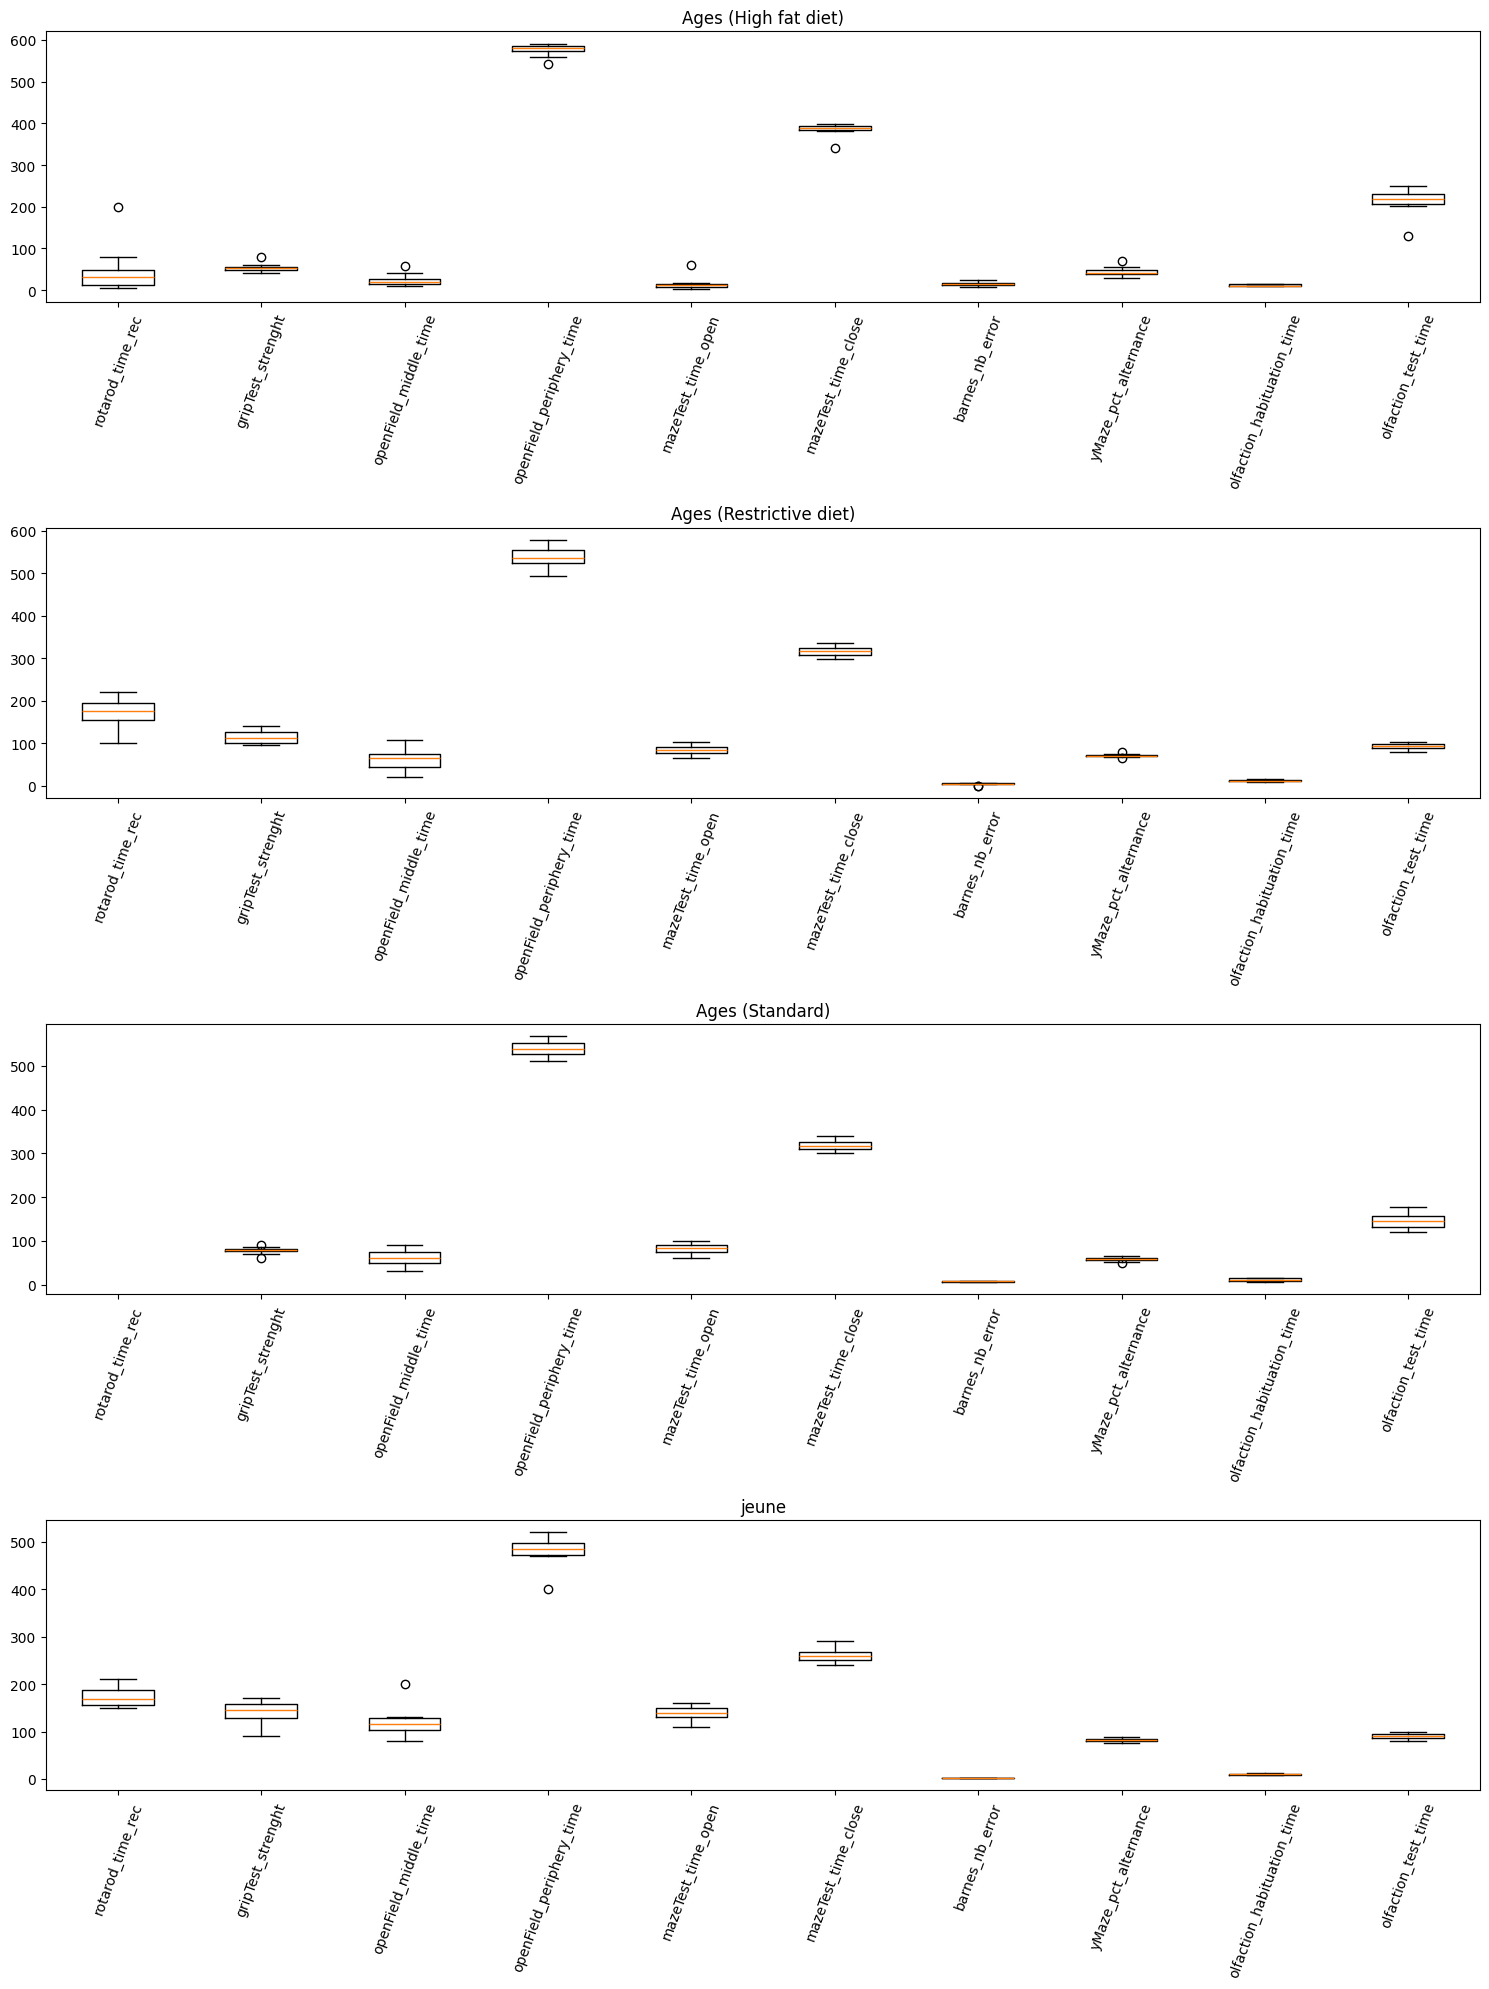

In [12]:
columns_to_include = ['rotarod_time_rec', 
    'gripTest_strenght', 
    # 'openField_distance', 
    'openField_middle_time', 
    'openField_periphery_time', 
    'mazeTest_time_open', 
    'mazeTest_time_close', 
    'barnes_nb_error', 
    'yMaze_pct_alternance', 
    'olfaction_habituation_time', 
    'olfaction_test_time']

# Sélectionnez les colonnes spécifiques
selected_columns = df_total.groupby('group')

fig, axs = plt.subplots(4, 1, figsize=(15,20))
nb = 0 #compteur

for group, data in selected_columns :
    axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
    axs[nb].set_title(group)
    axs[nb].tick_params(axis='x', rotation=70)
    nb += 1

plt.tight_layout()

In [13]:
# # Fonction pour générer le boxplot
# def plot_boxplot(group_name):

#     filtered_df = df_total[df_total['group'] == group_name]
#     id_values = filtered_df['id'].values

#     filtered_df = filtered_df.drop(columns=['group', 'id', 'age_bf', 'age_af','rotarod_time_tot', 'openField_time_tot', 'maze_time_tot'])
    
#     # Standardiser les valeurs
#     scaler = StandardScaler()
#     standardized_df = pd.DataFrame(scaler.fit_transform(filtered_df), columns=filtered_df.columns)
    
#     # Transposer le DataFrame
#     transposed_df = standardized_df.T
    
#     plt.figure(figsize=(13, 4))
    
#     # Boucler sur chaque colonne pour tracer les lignes avec les étiquettes appropriées
#     for i, column in enumerate(transposed_df.columns):
#         plt.plot(transposed_df.index, transposed_df[column], marker='o', label=id_values[i])
    
#     plt.xlabel('Test')
#     plt.ylabel('Valeurs standardisé')
#     plt.title(f'Résultat standardisé pour les souris du groupe : {group_name}')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.grid(True)
#     plt.xticks(rotation=75)
#     plt.show()

# children = []

# for group in df_total["group"].unique():
#     out = widgets.Output()  # Widget pour afficher du contenu
#     with out:
#         plot_boxplot(group)
#     children.append(out)

# tab = widgets.Tab()
# tab.children = children

# for i, group_name in enumerate(df_total["group"].unique()):
#     tab.set_title(i, group_name)

# display(tab)

**Analyse du graphique :**
Tous les groupes ont des outliers cependant la groupe 'Ages (High fat diet)' en a presque sur toutes ces colonnes et assez écarté des autres. De plus il manque une ou plusieurs valeurs dans la colonne 'rotarod_time_rec' du groupe 'Age (Standard)'. Hormis cela, le dataset semble plutôt propre. On va modéliser : 
- 3 graphique en ligne pour chaque groupe contenant les scores aux tests
- 1 graphique en ligne pour chaque groupe contenant la moyenne des groupes pour chaque test
Cela permet de voir les courbes de chaque souris et d'avoir une idée globale des scores de chaque groupe.

## 2) Nettoyage des données
---

**2.1 Gestion des outliers**

In [14]:
df_total = df_total[df_total.index != 33]

# 3) Corrélation entre les groupes


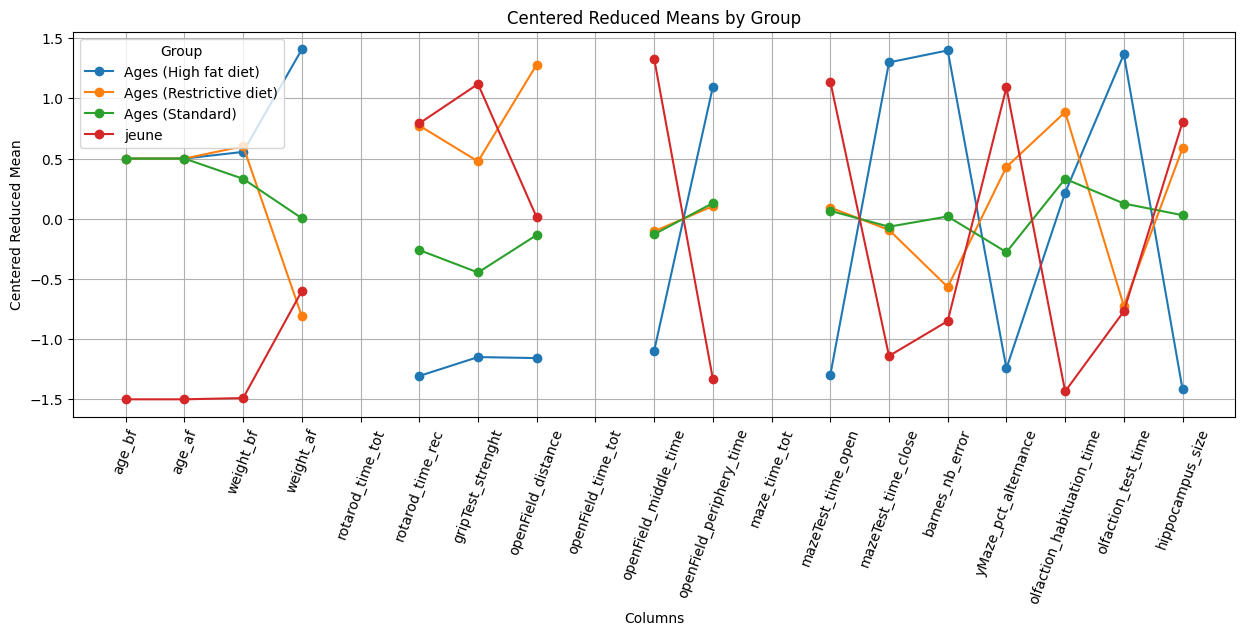

In [15]:
# Calculer la moyenne par groupe pour chaque colonne
grouped_means = df_total[df_total.index != 33].groupby('group').mean()
grouped_means.drop(columns=['rotarod_time_tot', 'openField_time_tot', 'maze_time_tot'])
# Centrer et réduire les moyennes
centered_reduced_means = (grouped_means - grouped_means.mean()) / grouped_means.std()

# Afficher les moyennes centrées réduites avec matplotlib
fig, ax = plt.subplots(figsize=(15, 5))


# Tracer les moyennes centrées réduites pour chaque groupe
for group in centered_reduced_means.index:
    ax.plot(centered_reduced_means.columns, centered_reduced_means.loc[group], marker='o', label=group)

# Ajouter des étiquettes et une légende
ax.set_xlabel('Columns')
ax.set_ylabel('Centered Reduced Mean')
ax.set_title('Centered Reduced Means by Group')
plt.xticks(rotation=70)
ax.legend(title='Group')
plt.ylim() 
plt.grid()

# Afficher le graphique
plt.show()

### Matrice de corrélation

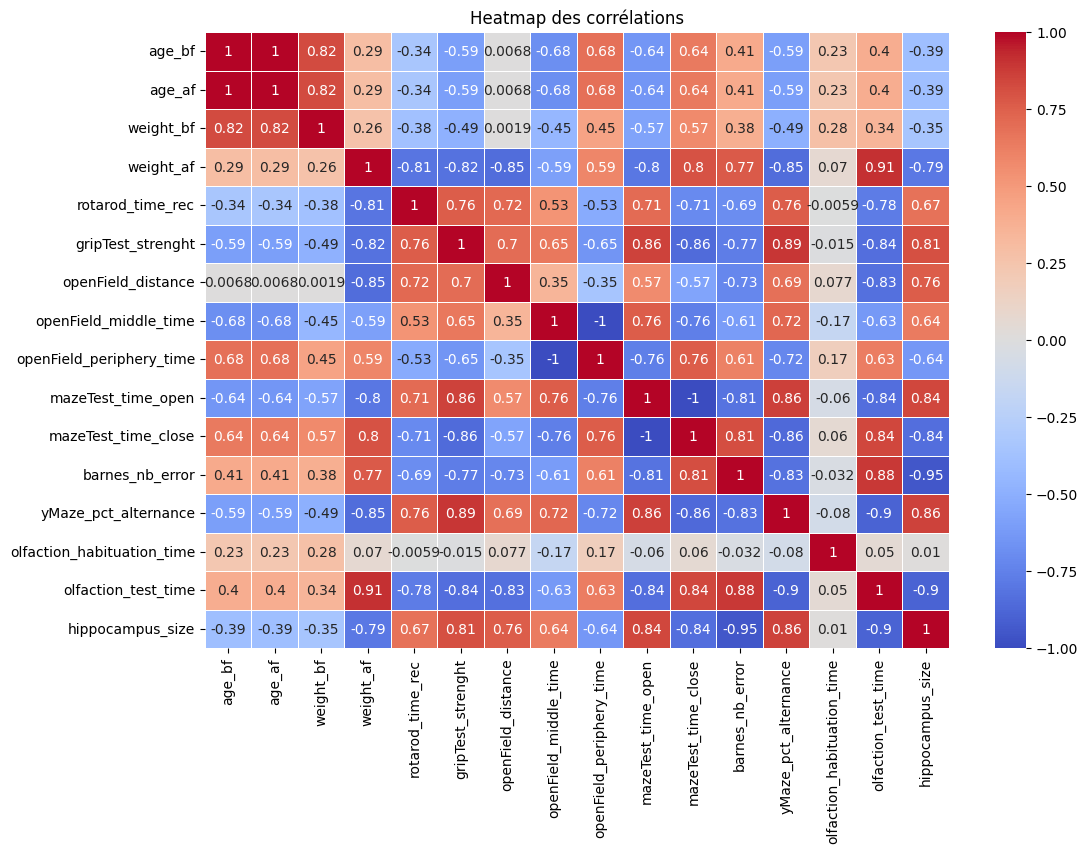

In [16]:
numeric_columns = df_total.drop(columns=['rotarod_time_tot', 'openField_time_tot', 'maze_time_tot']).select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_total[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()

Nous choisissons d'analyser la motricité et la mémoire, car ce sont les variables qui, on le pense représente mieux la vieillesse. 

variance inter-groupe 

## 3.1 Anova : XXXXXXXXXXX
Afin de tester si le type de régime alimentaire a un effet sur les fonctions motrices au cours du vieillissement chez la souris, deux tests ont été effectué : le Rotarod et le Griptest.

Ce test permet de tester l'endurance, la coordination motrice et l'équilibre des souris. Lors de ce test, l'animal est placé sur une roue dont la vitesse de rotation augmente au cours du test.

La mesure prise lors de ce test est la moyenne du temps où l'animal est resté sur l'appareil durant 3 essais.

Pour ce test, tout comme pour les autres, les groupes étaient indépendant.
La variable indépendante est : groupe, (jeune, agé, agé en restriction calorique, agé en régime hyper gras), catégoriel.

**Type de variable** :
* **Variable dépendante** : moyenne du temps passé sur le rotarod.

* **Variable contrôle** : groupe jeune, afin de s'assurer qu'il y a un effet du vieillissement.

**Hypothèses** :
* **H0** : Il n'y a pas de différence dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).

* **H1** : Il existe une différence significative dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires.

Afin de déterminer si il est possible d'effectuer une anova pour savoir si il y a une différence dans les moyennes de temps par groupe. La normal dis

### 3.1.2 Shapiro-Wilk : vérification de la condition de normalité

In [17]:
def norm_shapiro(data):
    list_provisoire = []
    list_name_shapiro_ok = []

    print("\nShapiro : \n",
          "H0 : Les données suivent une distribution normale (H0 non rejetée). \n",
          "H1 : Les données ne suivent pas une distribution normale (H0 rejetée). \n")

    for column in data.columns:
        if column != "group":
            print(f"--------------------- TEST : {column} ---------------------")
            for group, group_data in data.groupby("group"):
                print(f"{group} : ")
                stat, p_value = shapiro(group_data[column])
                if p_value > 0.05:
                    list_provisoire.append(column)
                    print(f"    OK (H0 non-rejetée) | {group} | Shapiro : {stat}, P-value : {p_value} \n")
                else:
                    print(f"    NO (H0 rejetté) | {group} |  Shapiro : {stat}, P-value : {p_value} \n")

    occurrences = Counter(list_provisoire)
    for value, count in occurrences.items():
        if count == 4:
            list_name_shapiro_ok.append(value)
    return np.unique(list_name_shapiro_ok)

In [18]:
columns_to_test = ['group','rotarod_time_rec', 
    'gripTest_strenght', 
    'openField_distance', 
    'openField_middle_time', 
    'openField_periphery_time', 
    'mazeTest_time_open', 
    'mazeTest_time_close', 
    'barnes_nb_error', 
    'yMaze_pct_alternance', 
    'olfaction_habituation_time', 
    'olfaction_test_time']

list_name_shapiro_ok = norm_shapiro(df_total[columns_to_test])


Shapiro : 
 H0 : Les données suivent une distribution normale (H0 non rejetée). 
 H1 : Les données ne suivent pas une distribution normale (H0 rejetée). 

--------------------- TEST : rotarod_time_rec ---------------------
Ages (High fat diet) : 
    OK (H0 non-rejetée) | Ages (High fat diet) | Shapiro : 0.9330791490787715, P-value : 0.4428354989969112 

Ages (Restrictive diet) : 
    OK (H0 non-rejetée) | Ages (Restrictive diet) | Shapiro : 0.9578136638316226, P-value : 0.7522234323755941 

Ages (Standard) : 
    NO (H0 rejetté) | Ages (Standard) |  Shapiro : nan, P-value : nan 

jeune : 
    OK (H0 non-rejetée) | jeune | Shapiro : 0.922052471680141, P-value : 0.520264990739902 

--------------------- TEST : gripTest_strenght ---------------------
Ages (High fat diet) : 
    OK (H0 non-rejetée) | Ages (High fat diet) | Shapiro : 0.9411150255656862, P-value : 0.5336943813068223 

Ages (Restrictive diet) : 
    OK (H0 non-rejetée) | Ages (Restrictive diet) | Shapiro : 0.939614165187928

### 3.1.1 Levene : vérification de la condition sur l'homogénéité des variances

In [20]:
def homogeneity_levene(test_name):
    list_name_levene = []

    print("Levene : \n",
          "H0 : Les variances des groupes sont homogènes (H0 non rejetée). \n",
          "H1 : Les variances des groupes ne sont pas homogènes (H0 rejetée). \n")

    groupes = [group_data for group_name, group_data in df_total.groupby("group")]

    for name in test_name:
        # Extraire les valeurs pour chaque test
        group_values = [data[name] for data in groupes]
        print(f"\nTest : {name}")
        # Réaliser le test de Levene
        stat, p_value = levene(*group_values)

        if p_value > 0.05:
            print(f"    OK | Levene : {stat}, P-value : {p_value}")
            list_name_levene.append(name)
        else:
            print(f"    NO | Levene : {stat}, P-value : {p_value}")

    return list_name_levene

homogeneity_levene(list_name_shapiro_ok)

Levene : 
 H0 : Les variances des groupes sont homogènes (H0 non rejetée). 
 H1 : Les variances des groupes ne sont pas homogènes (H0 rejetée). 


Test : gripTest_strenght
    NO | Levene : 5.8950225856424385, P-value : 0.0021498972586854407

Test : mazeTest_time_close
    NO | Levene : 3.9627068458962373, P-value : 0.015150208024373089

Test : mazeTest_time_open
    NO | Levene : 3.9627068458962373, P-value : 0.015150208024373089

Test : olfaction_test_time
    NO | Levene : 4.465796670808989, P-value : 0.008958684424907895

Test : openField_distance
    NO | Levene : 3.827994005598848, P-value : 0.017474441601466065

Test : openField_middle_time
    OK | Levene : 2.596021614981756, P-value : 0.0669450081800188

Test : openField_periphery_time
    OK | Levene : 2.5962559222204433, P-value : 0.06692751334831111

Test : yMaze_pct_alternance
    OK | Levene : 1.3367123963664653, P-value : 0.27723549325664093


['openField_middle_time', 'openField_periphery_time', 'yMaze_pct_alternance']

In [ ]:
# def anova(list_name_levene):
# # Si les conditions d'indépendance des groupes, de normalité de la distribution et d'homogénéité des variances, on fait l'ANOVA


    for test in list_name_levene:
        model = ols('test ~group', data=df_total).fit() #ols est une commande permettant de faire l'anova
        anova_table = sm.stats.anova_lm(model, typ=2) #affichage de l'anova
    anova_table

anova(list_name_levene)

NameError: name 'list_name_levene' is not defined

### Kruskal_wallis

In [ ]:
# def kruskal_wallis(list_levene):
list_kruskal_wallis = ['rotarod_time_rec', 'gripTest_strenght']
# list_kruskal_wallis = NOMDETOUTELESCOLONNES - list_name_levene : 
for test in list_kruskal_wallis:
    from scipy.stats import kruskal# Préparer les données par groupe
    groups = [df_total[df_total['group'] == group][test] for group in df_total['group'].unique()]

    # Appliquer le test de Kruskal-Wallis
    stat, p = kruskal(*groups)
    print(f"Statistique Kruskal-Wallis : {stat}")
    print(f"p-value : {p}")

# kruskal_wallis(list_levene)



Statistique Kruskal-Wallis : nan
p-value : nan
Statistique Kruskal-Wallis : 35.467455521306526
p-value : 9.704195644076888e-08


### ANOVA

### Test Post-hoc : Tukey

Ce test permet de savoir quel 

In [ ]:
# Test post-hoc Tukey pour significativité entre groupes
tukey = pairwise_tukeyhsd(endog=df_total['rotarod_time_rec'], groups=df_total['group'], alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
         group1                  group2         meandiff p-adj lower upper reject
---------------------------------------------------------------------------------
   Ages (High fat diet) Ages (Restrictive diet) 126.8333   nan   nan   nan  False
   Ages (High fat diet)         Ages (Standard)      nan   nan   nan   nan  False
   Ages (High fat diet)                   jeune 128.0833   nan   nan   nan  False
Ages (Restrictive diet)         Ages (Standard)      nan   nan   nan   nan  False
Ages (Restrictive diet)                   jeune     1.25   nan   nan   nan  False
        Ages (Standard)                   jeune      nan   nan   nan   nan  False
---------------------------------------------------------------------------------


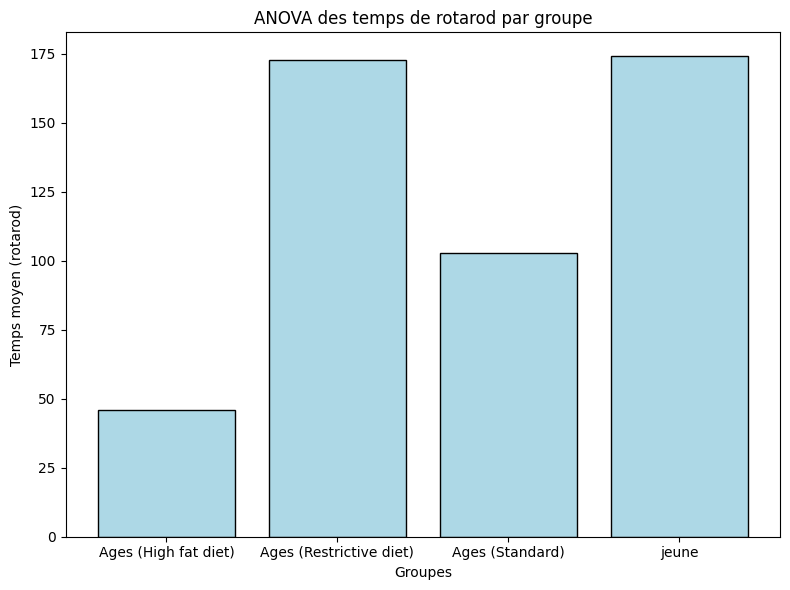

In [ ]:
# # Affichage des moyennes avec significativité trouvé dans l'ANOVA
# fig, ax = plt.subplots(figsize=(8, 6))

# # Bar plot des moyennes
# bars = ax.bar(group_means.index, group_means.values, color='lightblue', edgecolor='black')

# # Ajout des annotations pour significativité
# comparisons = tukey._results_table.data[1:]  # Récupère les résultats post-hoc sans le header
# significant_pairs = [comp for comp in comparisons if comp[4] < 0.05]  # Paires significatives

# # Ajouter les annotations pour les paires significatives
# y_max = max(group_means.values)
# for pair in significant_pairs:
#     group1, group2, _, _, p_value = pair
#     x1, x2 = group_means.index.get_loc(group1), group_means.index.get_loc(group2)
#     y = y_max + 5
#     ax.plot([x1, x1, x2, x2], [y, y + 1, y + 1, y], lw=1.5, color='black')  # Barre de liaison
#     ax.text((x1 + x2) / 2, y + 1, f"p={p_value:.3f}", ha='center', va='bottom', color='black')

# # Personnalisation du graphique
# ax.set_title("ANOVA des temps de rotarod par groupe")
# ax.set_ylabel("Temps moyen (rotarod)")
# ax.set_xlabel("Groupes")
# plt.tight_layout()

# plt.show()

## 3.2 Test d'aggripement


### 3.2.1 Shapiro : vérification de la condition de normalité

### 3.2.2 Shapiro : vérification de la condition de normalité